In [1]:
#import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Data Cleaning 

In [2]:
#import csv File

df = pd.read_csv('Diwali Sales Data.csv' , encoding = 'unicode_escape') 

# We use encoding='unicode_escape' to handle special or non-standard characters in the data file.
# For example:
#             If the CSV file contains characters like ₹, é, or other Unicode symbols, some systems may not process them correctly 
#             with the default encoding.
#             unicode_escape ensures such characters are read properly without causing errors.
#             It's commonly used when working with files containing special characters or symbols from different languages.

In [5]:
df.shape

# We use df.shape to find the number of rows and columns in a DataFrame.
# For example:
#            If df.shape returns (11251, 15), it means the DataFrame has 11251 rows and 15 columns.

(11251, 15)

In [15]:
df.head()

# df.head() shows the first 5 rows of the DataFrame by default.
# It helps you quickly preview the data. You can also specify a number, e.g., df.head(10) to see the first 10 rows.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [29]:
df.info()

# df.info() provides a summary of the DataFrame, including:

# The number of rows and columns.
# The data types of each column.
# The number of non-null (non-missing) values in each column.
# It helps you quickly understand the structure of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
# Drop unrelated / blank columns....

df.drop(['Status' , 'unnamed1'] , axis = 1 , inplace = True)

# square brackets ['Status', 'unnamed1'], we specify the columns that we want to drop.The list inside the square brackets 
#                                           indicates the column names to be removed from the DataFrame.

# axis=1       : This specifies that we want to drop columns (not rows). axis=0 would be for dropping rows.

# inplace=True : This means the changes are applied directly to the original DataFrame, and no new DataFrame is returned. 
#               If inplace=False (or omitted), a new DataFrame with the dropped columns would be returned, 
#               and the original DataFrame would remain unchanged.

In [45]:
# Check Null Values....

pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [43]:
# Drop Null values.....

df.dropna(inplace = True)

In [49]:
# Changing data type...
df['Amount'] = df['Amount'].astype('int')

In [53]:
df['Amount'].dtypes

dtype('int32')

In [55]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [61]:
# rename column name...

df.rename(columns = {'Marital_Status' : 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [63]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [71]:
df[['Amount' , 'Age' , 'Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


# EDA (Exploratory Data Analysis)

In [73]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

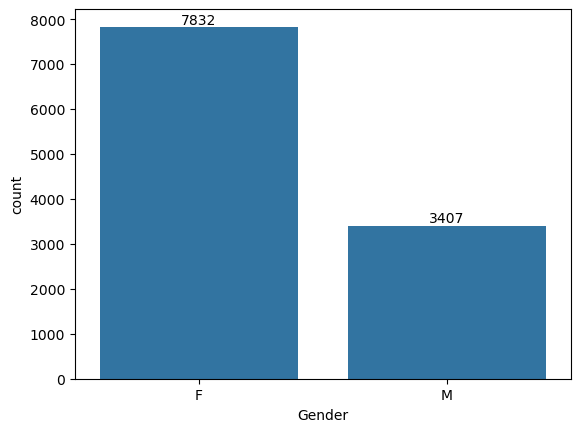

In [81]:
# plotting a bar chart for Gender and it's count...

ax = sns.countplot(x = 'Gender' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

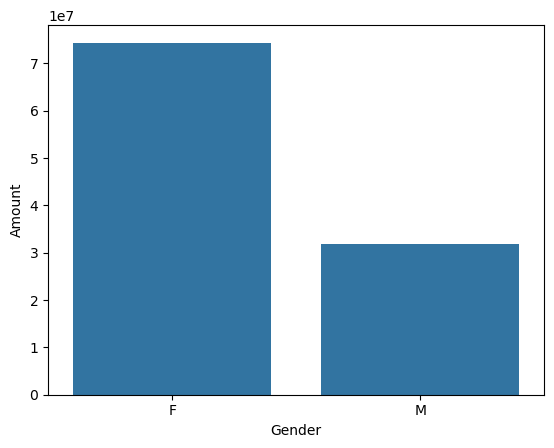

In [87]:
# plotting a bar chart for gender vs total amount.....

sales_gen = df.groupby(['Gender'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)

In [ ]:
# Insight 1  :- From above graphs we can see that most of the buyers are females and even the purchasing power 
#               of females are greater than men.

In [89]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Age 

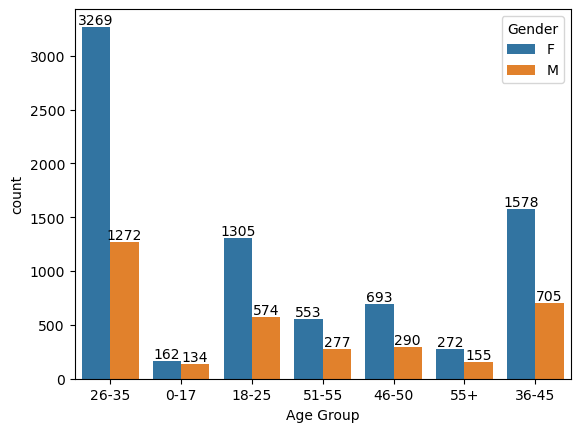

In [103]:
ax  = sns.countplot(data = df , x = 'Age Group' , hue  = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

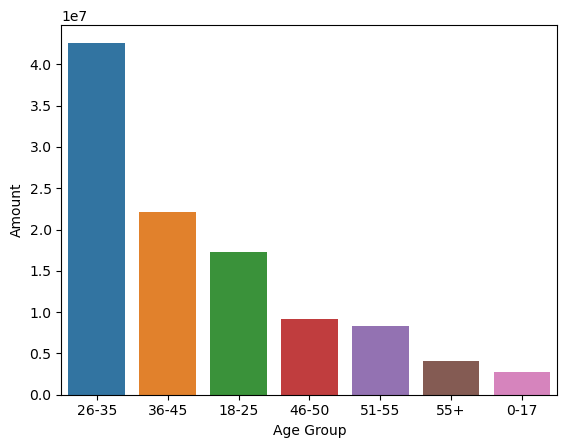

In [123]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(data=sales_age, x='Age Group', y='Amount', hue='Age Group')

In [ ]:
# Insight 2  :- From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

In [125]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# State

<Axes: xlabel='State', ylabel='Orders'>

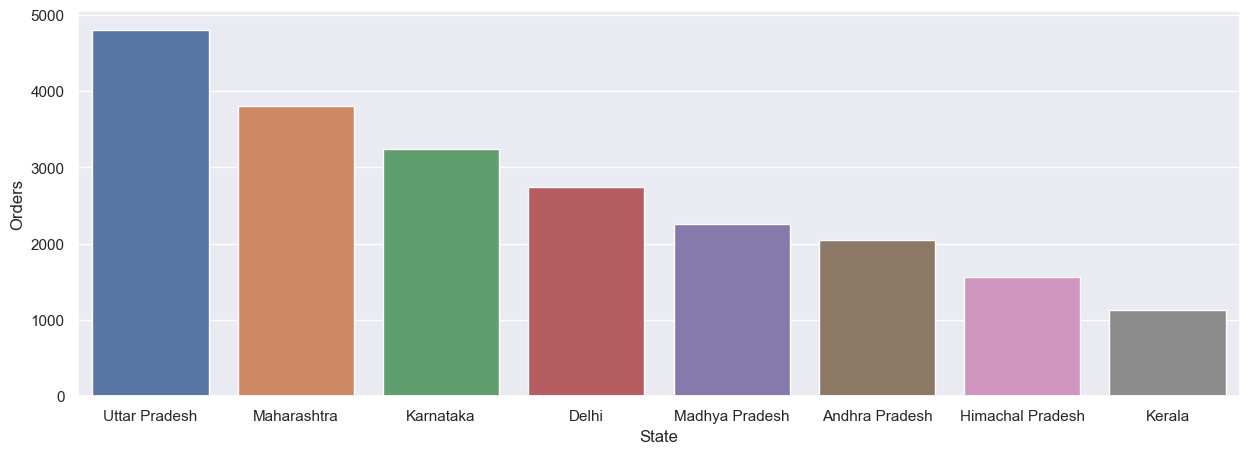

In [133]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'] , as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(8)

sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(x = 'State' , y = 'Orders' , data = sales_state , hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

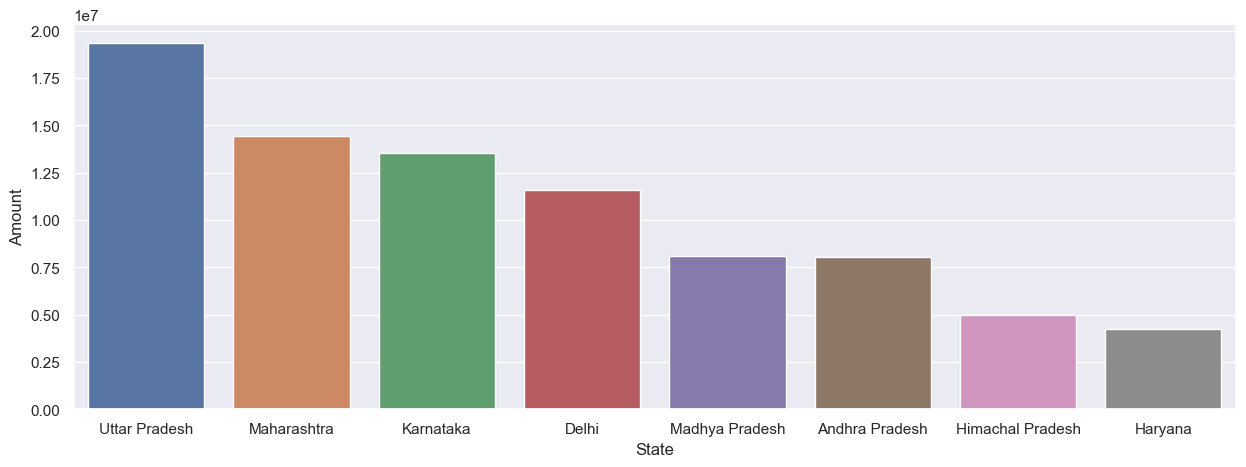

In [139]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount' , hue = 'State')

In [ ]:
# Insight 3 :- From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, 
#              Maharashtra and Karnataka respectively

In [141]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Marital_Status

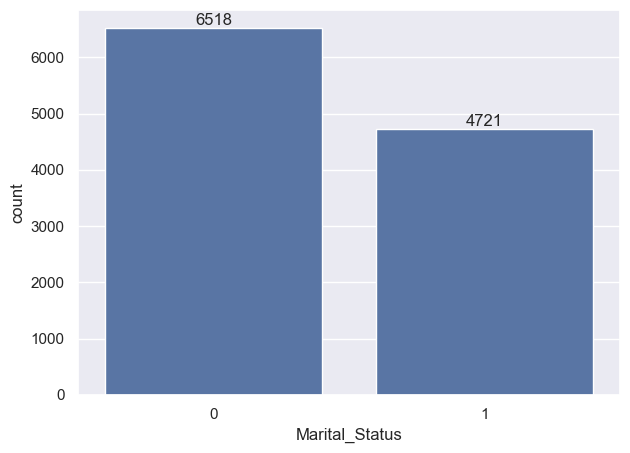

In [177]:
ax = sns.countplot(x = 'Marital_Status' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

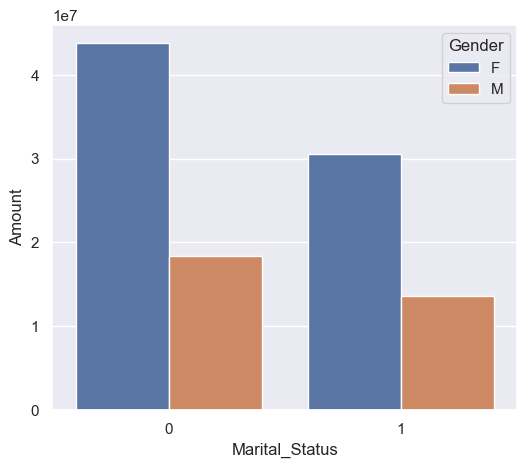

In [189]:
sales_marital = df.groupby(['Marital_Status' , 'Gender'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)


sns.barplot(data = sales_marital, x = 'Marital_Status',y= 'Amount', hue='Gender')

In [ ]:
# Insight 4 :- From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.

In [191]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Occupation

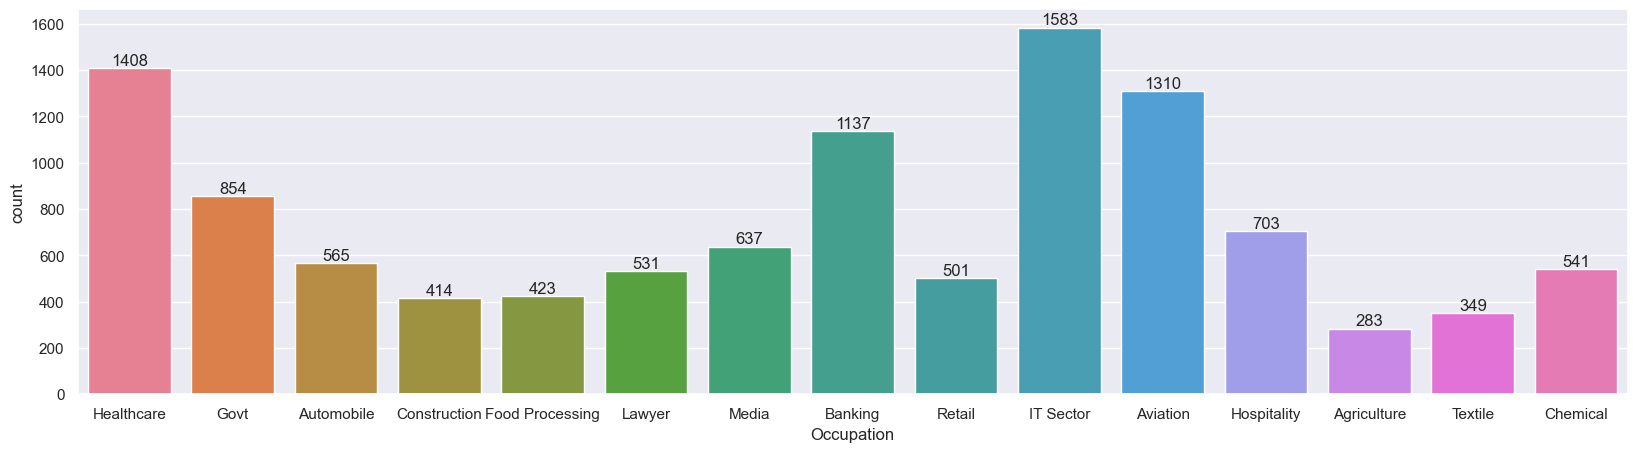

In [205]:
sns.set(rc = {'figure.figsize' : (20,5)})
ax = sns.countplot(data = df , x = 'Occupation' , hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

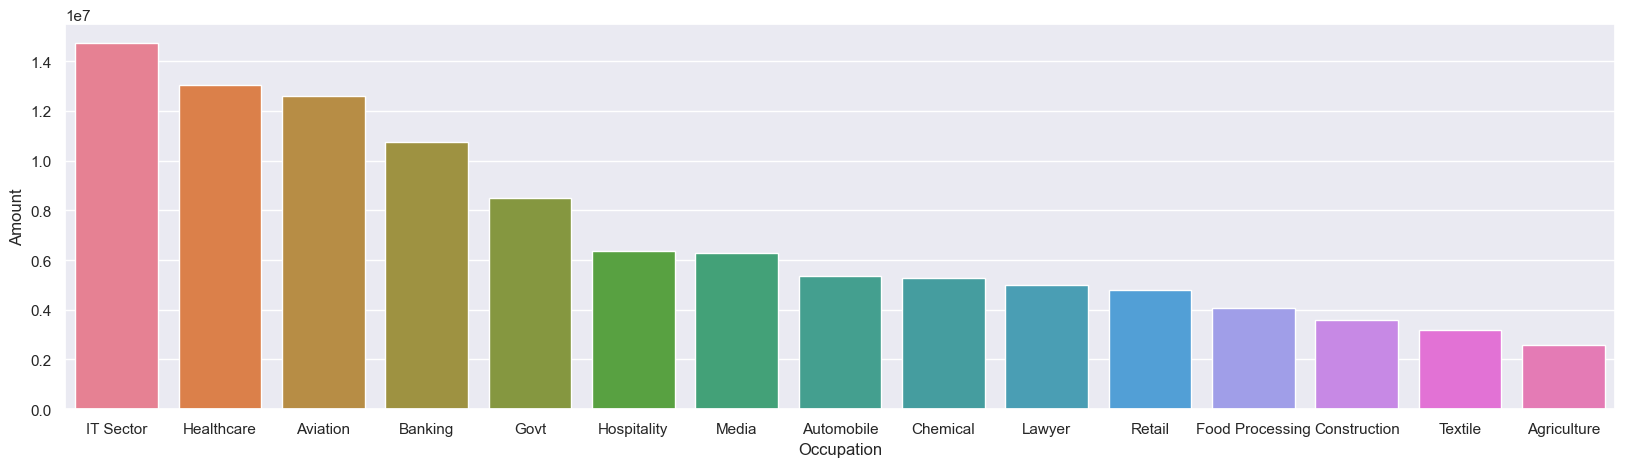

In [209]:
sales_occ = df.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Occupation' , y = 'Amount' , data = sales_occ , hue = 'Occupation')

In [ ]:
# Insight 5 :- From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

In [211]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product_Category

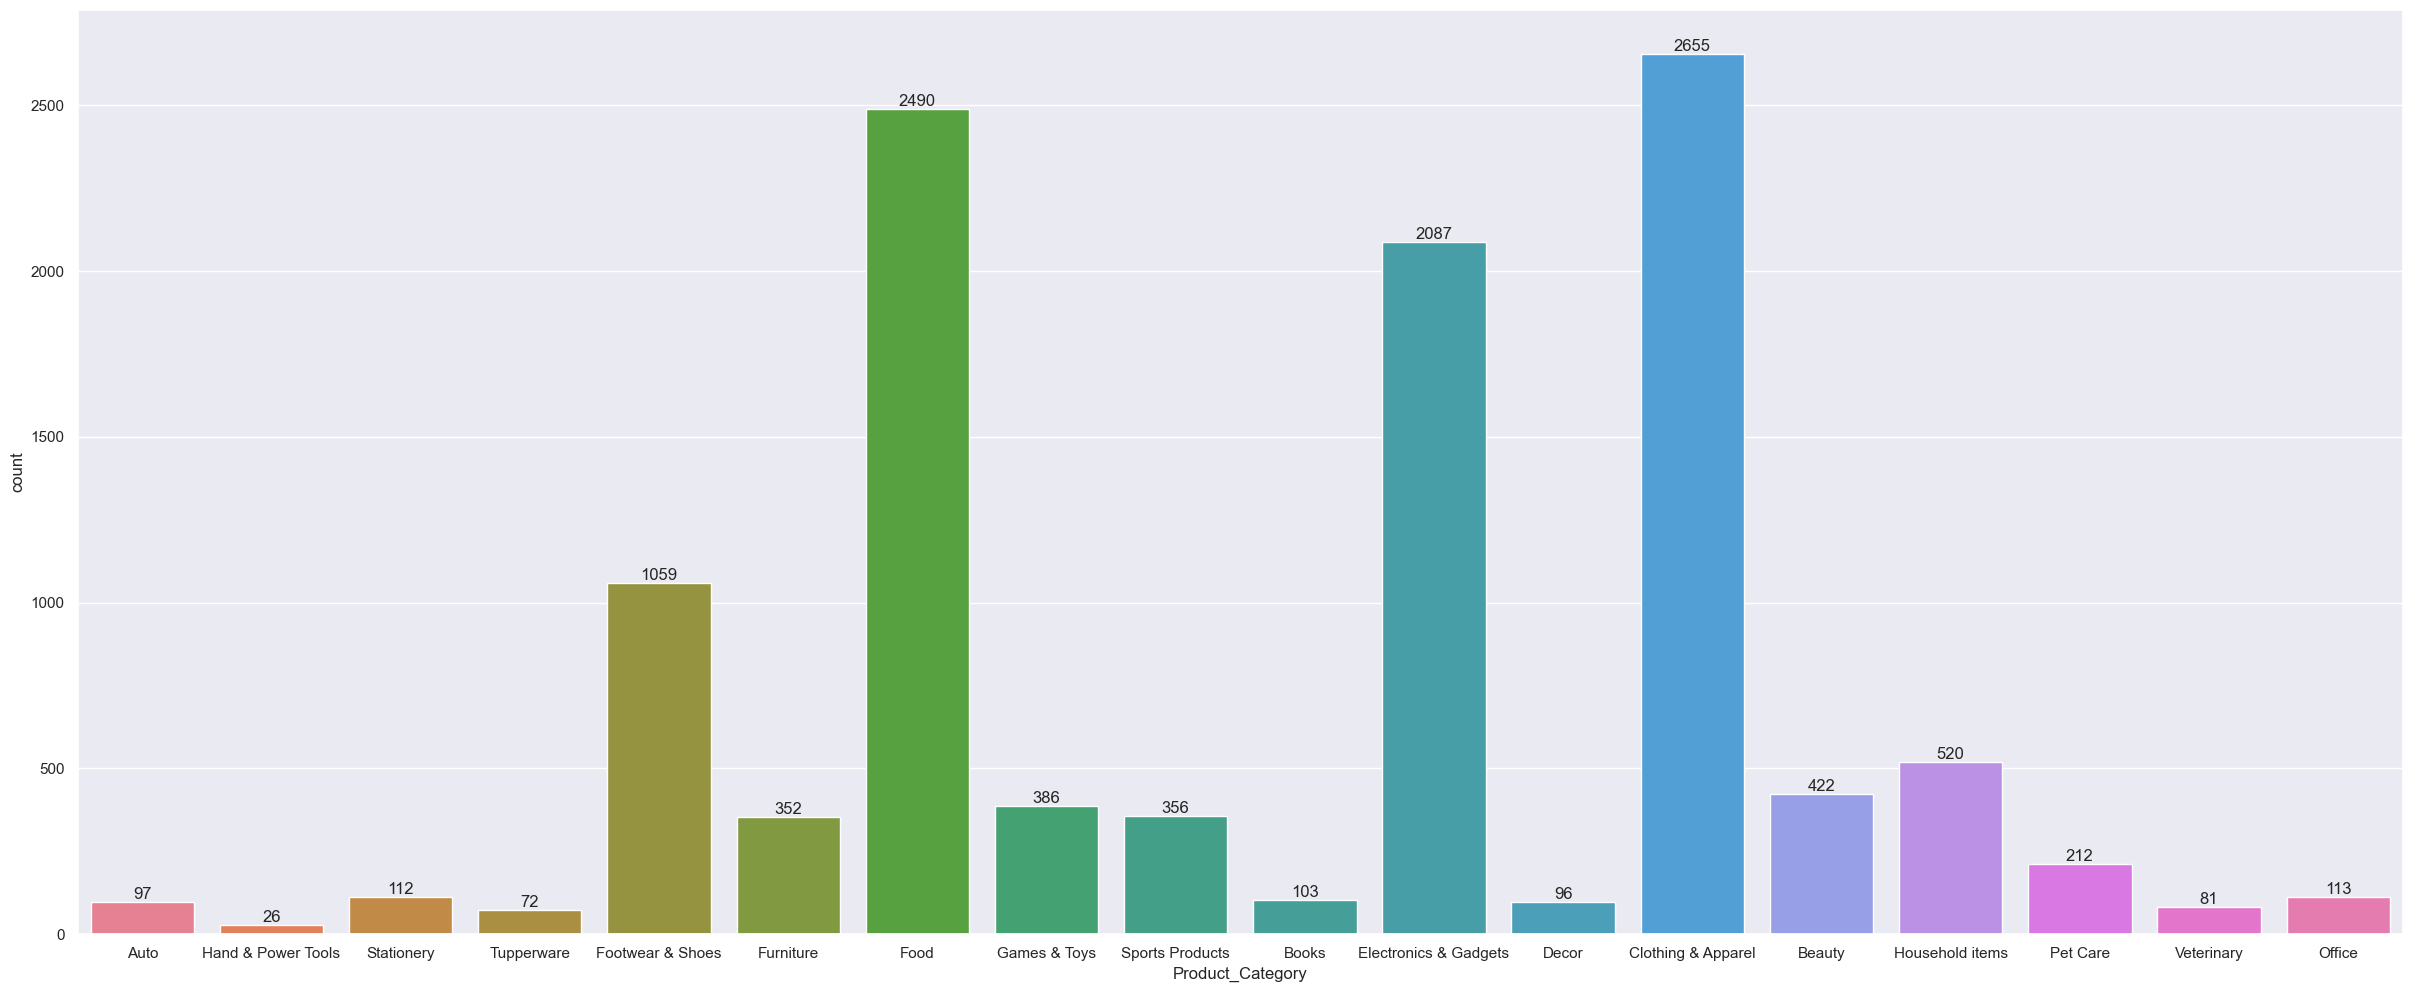

In [233]:
sns.set(rc = {'figure.figsize' : (30,12)})
ax = sns.countplot(data = df , x = 'Product_Category' , hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

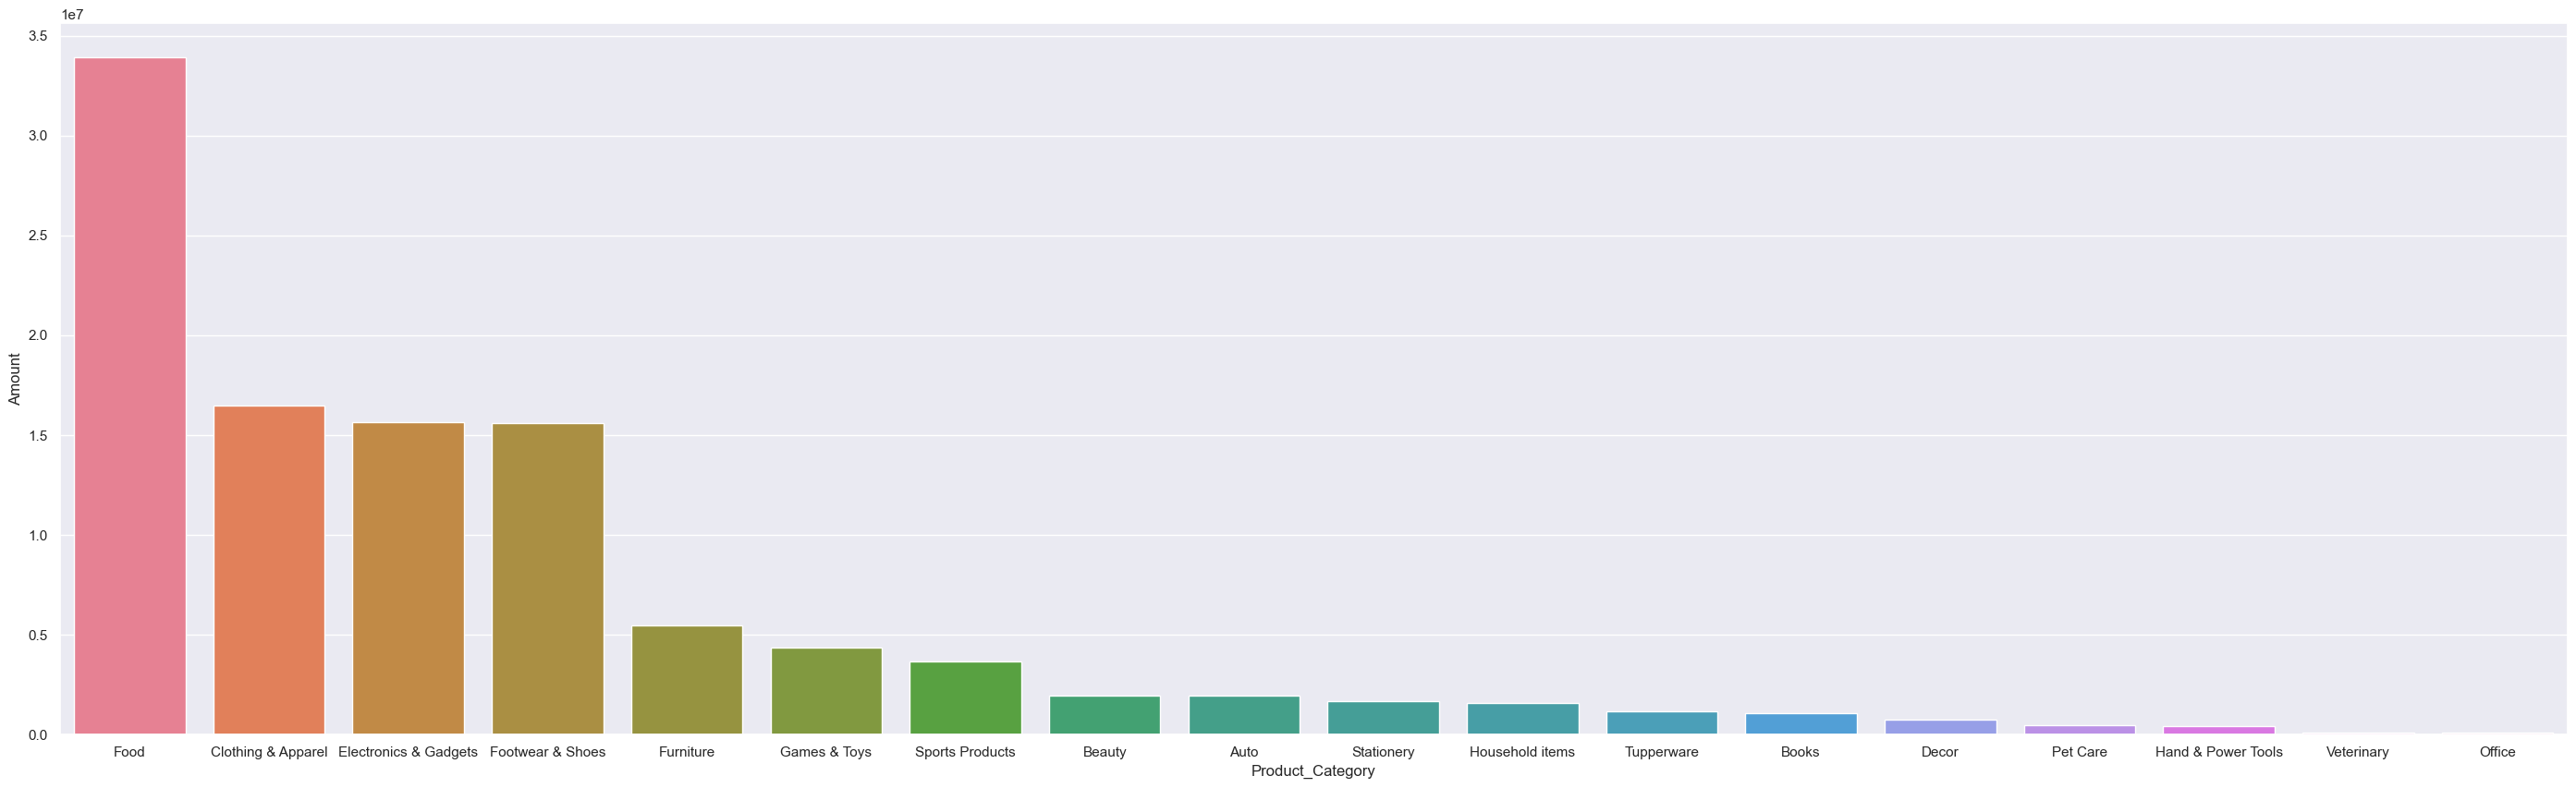

In [7]:
sales_prod = df.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending =  False)

sns.set(rc = {'figure.figsize' : (35,10)})
sns.barplot(x = 'Product_Category' , y = 'Amount' , data = sales_prod , hue = 'Product_Category')

<Axes: xlabel='Product_ID', ylabel='Orders'>

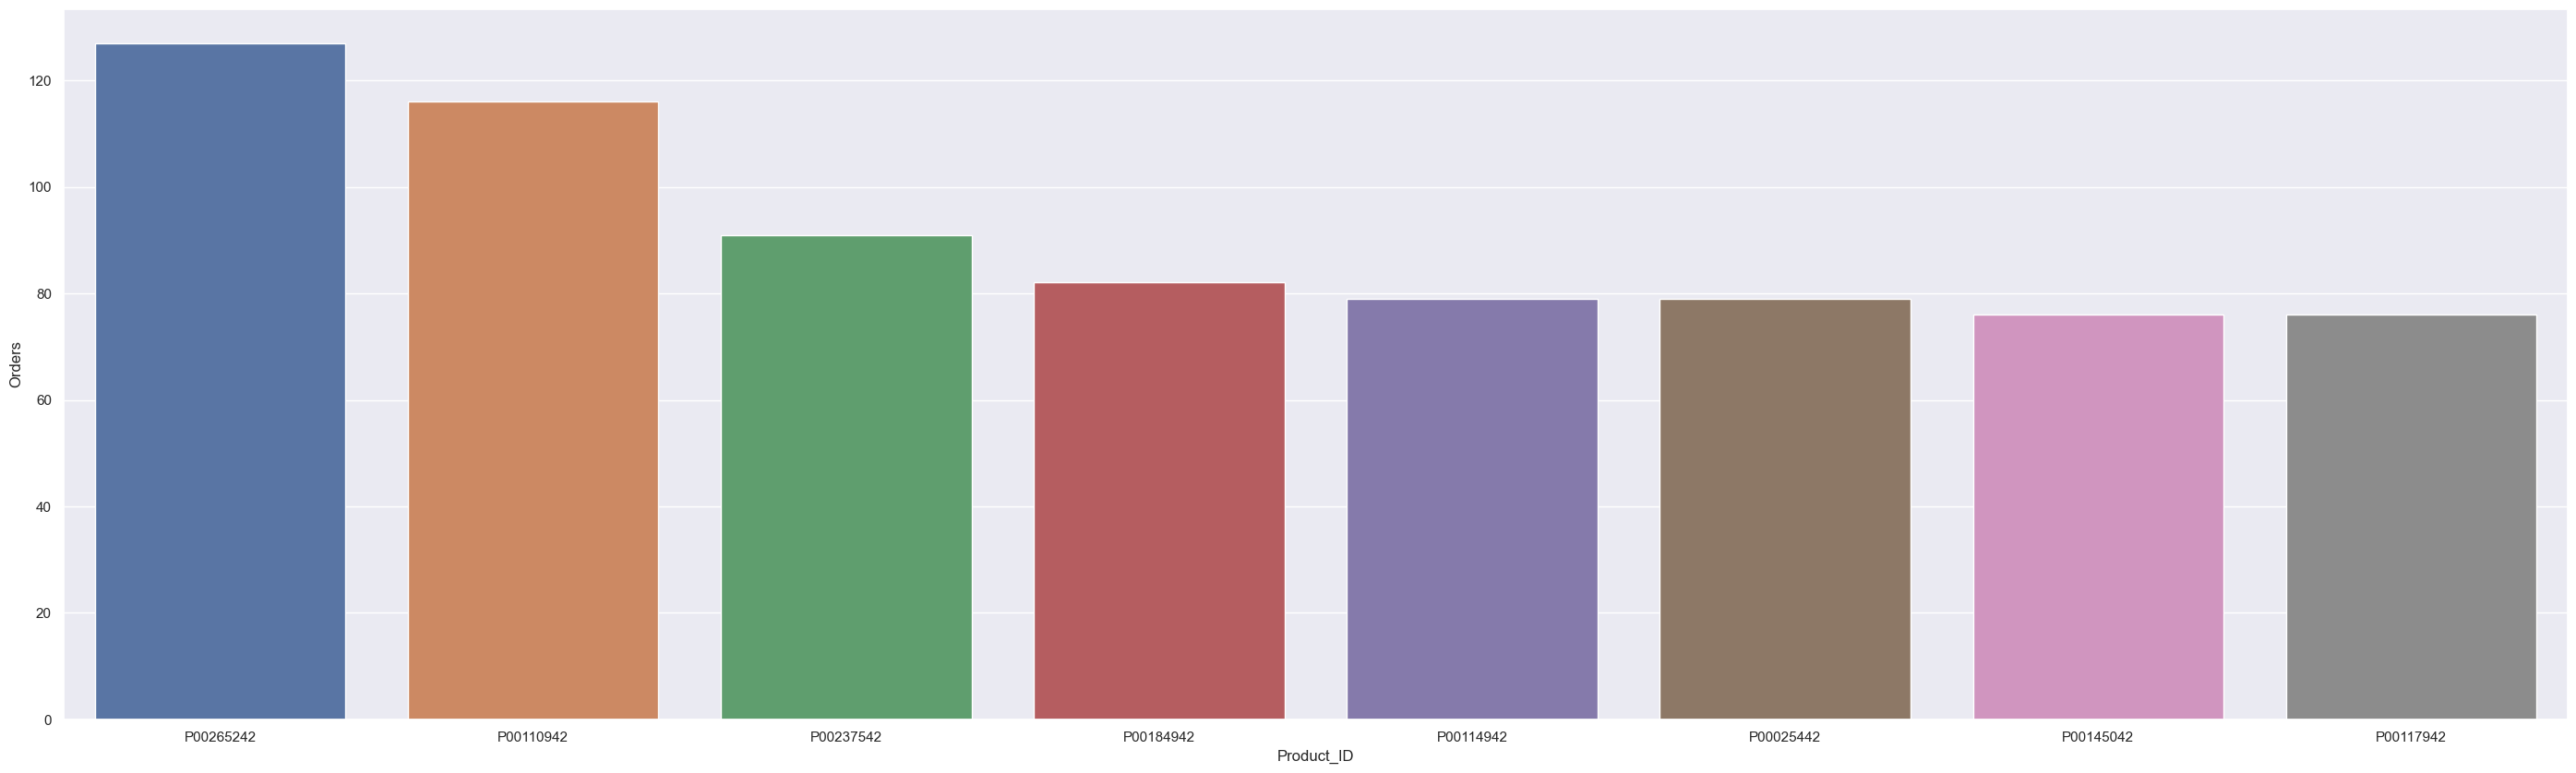

In [11]:
# top 10 most sold products 
sales_id = df.groupby(['Product_ID'] , as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(8)

sns.barplot(x = 'Product_ID' , y = 'Orders' , data = sales_id , hue = 'Product_ID')

In [ ]:
# Insight 6 :- *From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

# Conclusion :- 

# Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category